In [1]:
import numpy as np
from scipy.io import loadmat
import tensorflow as tf
import os

# These are used for plotting later on
from cycler import cycler
import matplotlib as mpl
from matplotlib import pyplot as plt

# Edit this line to point to the location of the data folder on your system.
data_folder_prefix = './data'

In [2]:
# load the ground truth for the test dataset, this
# would be the same image throughout
prefix = data_folder_prefix + '/Simulated/R_Sweep/'
test_images = np.load(prefix + 'test_images-R-0.50.npy')
# get the phase of the complex objects
test_images = np.angle(test_images)

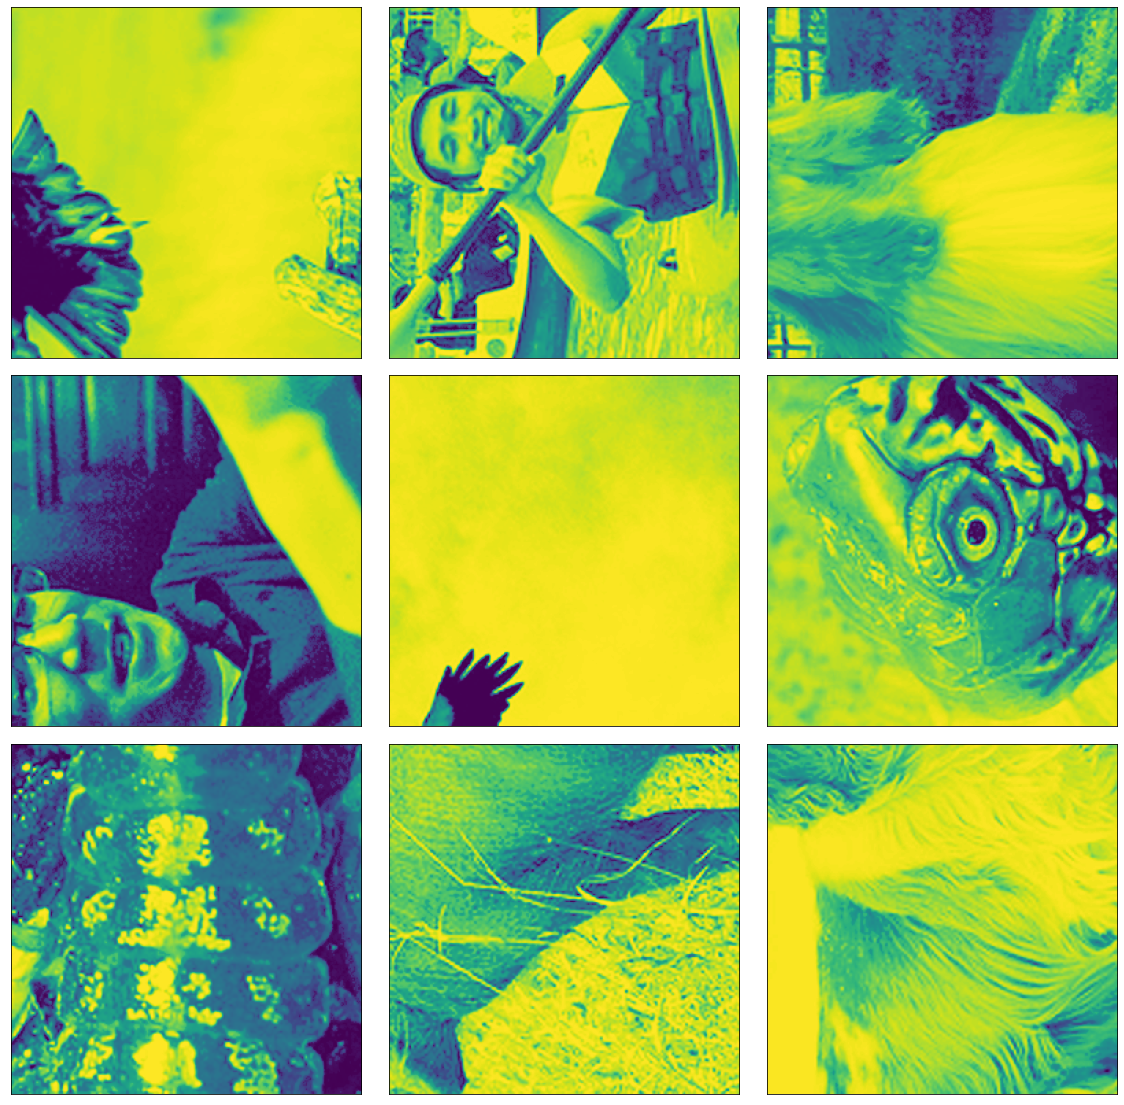

In [3]:
# this plot the ground truth
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
fig.subplots_adjust(hspace=.05, wspace=.05)

for i in range(9):
    ax = fig.add_subplot(3, 3, i +1)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.imshow(test_images[i], cmap = 'viridis')

# This cell is used to get generative not pretrained network results

In [ ]:
# load the MS-SSIM loss function
ssim = tf.image.ssim_multiscale

# generative not pretrained network results
ssim_mean1 = []
ssim_std1 = []

photon_level = 1e4

for idx, R in enumerate([0.25, 0.5, 1.0, 2.0]):
    
    # this list save all the output for the hyperparameter search
    pic = []
    
    # this list save the ssim for the hyperparameter search at the given R
    ssim_temp = []
    std_temp = []
    
    alphas = [1, 1/2, 1/4, 1/8, 1/16, 1/32]
    
    # loop over all the alpha values
    for alpha in alphas:
        # load the generative not pretrained network results
        empty = 0
        for string in ['2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30']:
            #print(str(string))
            if os.path.isfile(str(string) + '-not-pretrained-alpha-%0.2f-R-%0.2f.mat' % (alpha, R)):
                matfile = loadmat(str(string) + '-not-pretrained-alpha-%0.2f-R-%0.2f.mat' % (alpha, R))
                empty += 1
                
        if empty != 1:
            print("missing files for R-%0.2f-alpha-%0.2f" %(R, alpha))
            break
        rec_test_output = matfile['rec_test_output']

        pic.append(rec_test_output)
    
        loss_ssim_list = []
        
        #calculate the MS-SSIM object by object
        for gen, true in zip(rec_test_output, test_images):
            true = tf.expand_dims(true, -1)
            gen = tf.expand_dims(gen, -1)
            
            gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
            true = (true - np.min(true))/(np.max(true) - np.min(true))
            
            ssim_data =  ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
            loss_ssim_list.append(ssim_data)   
        
        ssim_temp.append(np.mean(loss_ssim_list))
        std_temp.append(np.std(loss_ssim_list))
        
    print('the current R is:', R)
    idx = np.argmax(ssim_temp)
    print('the best alpha is:', alphas[idx])
    # only append the best results for the given R
    ssim_mean1.append(ssim_temp[idx])
    ssim_std1.append(std_temp[idx])
    
    
    # this plot the best resulst for the given R
    plt.rcParams['figure.figsize'] = [20, 20]
    fig = plt.figure()
    fig.subplots_adjust(hspace=.05, wspace=.05)
    
    for i in range(9):
        ax = fig.add_subplot(3, 3, i +1)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(pic[idx][i], cmap = 'viridis')

# generative pretrained results

In [ ]:
# generative pretrained results
# the process is very similar as above
ssim_mean2 = []
ssim_std2 = []

photon_level = 1e4

for R in [0.25, 0.5, 1.0, 2.0]:
    ssim_temp = []
    std_temp = []
    pic = []
    
    alphas = [1, 1/2, 1/4, 1/8, 1/16, 1/32]
    # loop over all the alpha values
    for alpha in alphas:
        # load the generative not pretrained network results
        
        empty = 0
        for string in ['2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30']:
            #print(str(string))
            if os.path.isfile(str(string) + '-pretrained-alpha-%0.2f-R-%0.2f.mat' % (alpha, R)):
                matfile = loadmat(str(string) + '-pretrained-alpha-%0.2f-R-%0.2f.mat' % (alpha, R))
                empty += 1
                
        if empty != 1:
            print("missing files for R-%0.2f-alpha-%0.2f" %(R, alpha))
            break
            
        rec_test_output = matfile['rec_test_output']
        
        pic.append(rec_test_output)
    
        loss_ssim_list = []
        for gen, true in zip(rec_test_output, test_images):
            true = tf.expand_dims(true, -1)
            gen = tf.expand_dims(gen, -1)
                        
            gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
            true = (true - np.min(true))/(np.max(true) - np.min(true))
            
            ssim_data =  ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
            loss_ssim_list.append(ssim_data)   
        
        ssim_temp.append(np.mean(loss_ssim_list))
        std_temp.append(np.std(loss_ssim_list))
        
    print('the current R is:', R)
    idx = np.argmax(ssim_temp)
    print('the best alpha is:', alphas[idx])
    ssim_mean2.append(ssim_temp[idx])
    ssim_std2.append(std_temp[idx])
    
    plt.rcParams['figure.figsize'] = [20, 20]
    fig = plt.figure()
    fig.subplots_adjust(hspace=.05, wspace=.05)

    for i in range(9):
        ax = fig.add_subplot(3, 3, i +1)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(pic[idx][i], cmap = 'viridis')


# not generative not pretrained

In [ ]:
# not generative not pretrained
ssim_mean3 = []
ssim_std3 = []

photon_level = 1e4

for R in [0.25, 0.5, 1, 2]:
    ssim_temp = []
    std_temp = []
    
    matfile = loadmat('2021-09-28not-pretrained-R-' + str(R) +'-peak-10000.0')
    rec_test_output = matfile['rec_test_output']
    
    
    plt.rcParams['figure.figsize'] = [20, 20]
    fig = plt.figure()
    fig.subplots_adjust(hspace=.05, wspace=.05)

    for i in range(9):
        ax = fig.add_subplot(3, 3, i +1)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(rec_test_output[i], cmap = 'viridis')

    loss_ssim_list = []
    for gen, true in zip(rec_test_output, test_images):
        true = tf.expand_dims(true, -1)
        gen = tf.expand_dims(gen, -1)
                   
        gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
        true = (true - np.min(true))/(np.max(true) - np.min(true)) 
        
        ssim_data =  ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
        loss_ssim_list.append(ssim_data)   

    ssim_temp.append(np.mean(loss_ssim_list))
    std_temp.append(np.std(loss_ssim_list))
        
    print('R =', R)
    ssim_mean3.append(ssim_temp[0])
    ssim_std3.append(std_temp[0])

# not generative pretrained

In [ ]:
# not generative pretrained
ssim_mean4 = []
ssim_std4 = []

photon_level = 1e4

for R in [0.25, 0.5, 1, 2]:
    pcc_temp = []
    ssim_temp = []
    std_temp = []
    
    matfile = loadmat('2021-09-27pretrained-R-' + str(R) +'-peak-10000.0')
    rec_test_output = matfile['rec_test_output']
    
    plt.rcParams['figure.figsize'] = [20, 20]
    fig = plt.figure()
    fig.subplots_adjust(hspace=.05, wspace=.05)

    for i in range(9):
        ax = fig.add_subplot(3, 3, i +1)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(rec_test_output[i], cmap = 'viridis')

    loss_ssim_list = []
    for gen, true in zip(rec_test_output, test_images):
        true = tf.expand_dims(true, -1)
        gen = tf.expand_dims(gen, -1)
        
        gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
        true = (true - np.min(true))/(np.max(true) - np.min(true))
            
        ssim_data =  ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
        loss_ssim_list.append(ssim_data)   

    ssim_temp.append(np.mean(loss_ssim_list))
    std_temp.append(np.std(loss_ssim_list))
        
    print('R =', R)
    ssim_mean4.append(ssim_temp[0])
    ssim_std4.append(std_temp[0])

# End-to-End

In [ ]:
# End-to-End
ssim_mean5 = []
ssim_std5 = []

photon_level = 1e4

for R in [0.25, 0.5, 1, 2]:
    ssim_temp = []
    std_temp = []

    rec_test_output = np.load('End-to-End-test-output-R-' + str(R) + '-photon-10000.0.npy')
    
    
    plt.rcParams['figure.figsize'] = [20, 20]
    fig = plt.figure()
    fig.subplots_adjust(hspace=.05, wspace=.05)

    for i in range(9):
        ax = fig.add_subplot(3, 3, i +1)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(rec_test_output[i], cmap = 'viridis')

    loss_ssim_list = []
    for gen, true in zip(rec_test_output, test_images):
        true = tf.expand_dims(true, -1)
        gen = tf.expand_dims(gen, -1)
        
        gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
        true = (true - np.min(true))/(np.max(true) - np.min(true))
        
        ssim_data =  ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
        loss_ssim_list.append(ssim_data)   

    ssim_temp.append(np.mean(loss_ssim_list))
    std_temp.append(np.std(loss_ssim_list))
        
    print('R =', R)
    ssim_mean5.append(ssim_temp[0])
    ssim_std5.append(std_temp[0])

# This cell is used to generate input approximants

In [ ]:
photon_level = 1e4
lr = 1

for r, R in enumerate([0.25, 0.5, 1, 2]):
    for i, iters in enumerate([1]):
        iter_input = np.load('./data/Simulated/R_Sweep/test-reconstruction-R-%0.2f-phperpix-%d-iters-%d-lr-%0.2f.npy' 
                             % (R, photon_level, iters, lr)).astype(np.float32)
        
        plt.rcParams['figure.figsize'] = [20, 20]
        fig = plt.figure()
        fig.subplots_adjust(hspace=.05, wspace=.05)

        for i in range(9):
            ax = fig.add_subplot(3, 3, i +1)
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
            plt.imshow(iter_input[i], cmap = 'viridis')

# Iterative reconstruction

In [ ]:
iterative_std = []
iterative_ssim = []
photon_level = 1e4
lr = 0.5

for r, R in enumerate([0.25, 0.5, 1, 2]):
    for i, iters in enumerate([100]):
        iter_input = np.load('./data/Simulated/R_Sweep/test-reconstruction-R-%0.2f-phperpix-%d-iters-%d-lr-%0.2f.npy' 
                             % (R, photon_level, iters, lr)).astype(np.float32)
        
        plt.rcParams['figure.figsize'] = [20, 20]
        fig = plt.figure()
        fig.subplots_adjust(hspace=.05, wspace=.05)

        for i in range(9):
            ax = fig.add_subplot(3, 3, i +1)
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
            plt.imshow(iter_input[i], cmap = 'viridis')

        iterloss_ssim_list = []
        for gen, true in zip(iter_input, test_images):
            #gen = np.expand_dims(gen, axis=-1)
            #gen = denoise_tv_chambolle(gen, weight=0.05)[..., 0]
            #gen = exposure.equalize_hist(gen).astype(np.float32)
            true = tf.expand_dims(true, -1)
            gen = tf.expand_dims(gen, -1)
            
            gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
            true = (true - np.min(true))/(np.max(true) - np.min(true))
            
            ssim_data = ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
            iterloss_ssim_list.append(ssim_data)

        iterative_ssim.append(np.mean(iterloss_ssim_list))
        iterative_std.append(np.std(iterloss_ssim_list))

In [ ]:
print(ssim_mean1, ssim_mean2, ssim_mean3, ssim_mean4)

# Plotting the R sweep results

In [ ]:
from cycler import cycler
import matplotlib as mpl

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 16]

plt.style.use('seaborn-whitegrid')

mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'chocolate', 'olive'])

plt.rcParams['figure.figsize'] = [20, 16]


labels = ['R = 0.25', 'R = 0.5', 'R = 1', 'R = 2']

x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width * 3/2, ssim_mean4, width, yerr=ssim_std4, label='Non Generative', ecolor='black', capsize=5)
rects2 = ax.bar(x - width * 1/2, ssim_mean1, width, yerr=ssim_std1, label='Generative', ecolor='black', capsize=5)
#rects3 = ax.bar(x + width * 0, ssim_mean2, width, yerr=ssim_std2, label='Generative-Pretrain', ecolor='black', capsize=5)
rects3 = ax.bar(x + width * 1/2, iterative_ssim, width, yerr=iterative_std, label='Iterative', ecolor='black', capsize=5)
rects3 = ax.bar(x + width * 3/2, ssim_mean5, width, yerr=ssim_std5, label='End-to-End', ecolor='black', capsize=5)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MS-SSIM', fontsize=35)
#ax.set_title('R=0.25, 0.5, 1, 2' + ' with 1e3 photon and ImageNet4K', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=25)
ax.tick_params(axis='both', labelsize=35)
ax.legend(fontsize=35, loc='upper right')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('3')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
fig.tight_layout()
plt.ylim(0., 1.08)
plt.show()

In [ ]:
lr = 0.5

iter_ssim = []

for R in [0.25, 0.5, 1, 2]:
    for photon_level in [1e4]:
        for i, iters in enumerate([1, 5, 10, 20, 30, 40, 50, 60]):
            iter_input = np.load('./data/Simulated/R_Sweep/test-reconstruction-R-%0.2f-phperpix-%d-iters-%d-lr-%0.2f.npy' 
                             % (R, photon_level, iters, lr)).astype(np.float32)

            iterloss_ssim_list = []
            for gen, true in zip(iter_input, test_images):
                #gen = np.expand_dims(gen, axis=-1)
                #gen = denoise_tv_chambolle(gen, weight=0.2)[..., 0]
                #gen = exposure.equalize_hist(gen).astype(np.float32)
                true = tf.expand_dims(true, -1)
                gen = tf.expand_dims(gen, -1)
                
                gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
                true = (true - np.min(true))/(np.max(true) - np.min(true))
                
                ssim_data = ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
                iterloss_ssim_list.append(ssim_data)
                
            iter_ssim.append(np.mean(iterloss_ssim_list))

In [ ]:
len(iter_ssim)

In [ ]:
# MS-SSIM for the best deep-k-learning approach, this is not geneartive and not pretrained results
best_deep_k_learning = ssim_mean4
# the time in (ms) for deep learning model to process one object
deep_k_learning_time = [4.45, 4.42, 4.43, 4.42]
# the time to generate the approximant object, the sum is the total runtime for deep k-learning framework
for i, R in enumerate([0.25, 0.5, 1, 2]):
    runtime_array = np.load('./data/Simulated/R_Sweep/runtimes-R-%0.2f-phperpix-%d-lr-0.50.npy'% (R, 1e4))
    deep_k_learning_time[i] += runtime_array[1, 0]

In [ ]:
deep_k_learning_time

In [ ]:
plt.style.use('seaborn-whitegrid')

mpl.rcParams['axes.prop_cycle'] = cycler(color=['g', 'b', 'chocolate', 'darkorange'])

plt.rcParams['figure.figsize'] = [20, 16]

annotations=['R = 0.25', 'R = 0.5', 'R = 1', 'R = 2']

marker = ['x', '*', '.', '>']

fig, ax = plt.subplots()

lower_bound = []
upper_bound = []

for i, R in enumerate([0.25, 0.5, 1, 2]):
    runtime_array = np.load('./data/Simulated/R_Sweep/runtimes-R-%0.2f-phperpix-%d-lr-0.50.npy'% (R, 1e4))
    #print(runtime_array[1])
    idx = 8
    for j, quality in enumerate(iter_ssim[8*i + 1: 8*i +8]):
        if quality >= best_deep_k_learning[i]:
            idx = j
            #print(idx)
            print("lower bound ratio:", runtime_array[1, idx+1]/deep_k_learning_time[i])
            lower_bound.append(runtime_array[1, idx+1]/deep_k_learning_time[i])
            print("upper bound ratio:", runtime_array[1, idx+2]/deep_k_learning_time[i])
            upper_bound.append(runtime_array[1, idx+2]/deep_k_learning_time[i])
            break
        
    ax.plot(runtime_array[1, 1:idx+1], iter_ssim[8*i + 1: 8*i+idx+1], '--' + marker[i], 
             label = "Iterative " + annotations[i], markersize=29)
    
plt.scatter(deep_k_learning_time, best_deep_k_learning, marker = 'o', color='r', s=380, label = "Deep k-Learning")

for i, label in enumerate(annotations):
    plt.annotate(label, (deep_k_learning_time[i], best_deep_k_learning[i]), fontsize=35, color='r')

plt.legend(loc='upper right', fontsize=35)
plt.xlabel('Runtime in millisecond', fontsize=35)
plt.ylabel('MS-SSIM', fontsize=35)
plt.ylim(0.05, 1.06)
#plt.xlim(0, 100)
plt.xscale('log')
#plt.title('Runtime Comparison', fontsize=35)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('3')
ax.tick_params(axis='both', labelsize=35)
fig.tight_layout()

In [ ]:
print(iter_ssim)

In [ ]:
# change the prefix for plotting noise sweep resulst
prefix = data_folder_prefix + '/Simulated/Fixed_R_Noise_Sweep/'

# Repeat for noise sweep results

In [ ]:
# generative not pretrained
pcc_mean11 = []
ssim_mean11 = []
ssim_std11 = []

R = 0.5

for idx, photon_level in enumerate([1, 10, 100.0, 1e3]):
    pic = []
    ssim_temp = []
    std_temp = []
    
    alphas = [1, 1/2, 1/4, 1/8, 1/16, 1/32]
    # loop over all the alpha values
    for alpha in alphas:
        # load the generative not pretrained network results
        empty = 0
        for string in ['2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30']:
            #print(str(string))
            if os.path.isfile(str(string) + '-not-pretrained-alpha-%0.2f-R-%0.2f-photon-%0.2f.mat' % (alpha, R, photon_level)):
                matfile = loadmat(str(string) + '-not-pretrained-alpha-%0.2f-R-%0.2f-photon-%0.2f.mat' % (alpha, R, photon_level))
                empty += 1
                
        if empty != 1:
            print("missing files for R-%0.2f-alpha-%0.2f-photon-%0.2f" %(R, alpha, photon_level))
            break
        rec_test_output = matfile['rec_test_output']

        pic.append(rec_test_output)
    
        loss_ssim_list = []
        for gen, true in zip(rec_test_output, test_images):
            true = tf.expand_dims(true, -1)
            gen = tf.expand_dims(gen, -1)
            
            gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
            true = (true - np.min(true))/(np.max(true) - np.min(true))
            
            ssim_data =  ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
            loss_ssim_list.append(ssim_data)   
        
        ssim_temp.append(np.mean(loss_ssim_list))
        std_temp.append(np.std(loss_ssim_list))
        
    print('photon_level =', photon_level)
    idx = np.argmax(ssim_temp)
    print('the best alpha is:', alphas[idx])
    ssim_mean11.append(ssim_temp[idx])
    ssim_std11.append(std_temp[idx])
    
    plt.rcParams['figure.figsize'] = [20, 20]
    fig = plt.figure()
    fig.subplots_adjust(hspace=.05, wspace=.05)

    for i in range(16):
        ax = fig.add_subplot(4, 4, i +1)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(pic[idx][i], cmap = 'viridis')

In [ ]:
# generative pretrained
ssim_mean22 = []
ssim_std22 = []

R = 0.5

for idx, photon_level in enumerate([1, 10, 100.0, 1e3]):
    
    pic = []
    
    ssim_temp = []
    std_temp = []
    
    alphas = [1, 1/2, 1/4, 1/8, 1/16, 1/32]
    
    # loop over all the alpha values
    for alpha in alphas:
        # load the generative not pretrained network results
        empty = 0
        for string in ['2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30']:
            #print(str(string) + '-pretrained-alpha-%0.2f-R-%0.2f-photon-%0.2f.mat' % (alpha, R, photon_level))
            if os.path.isfile(str(string) + '-pretrained-alpha-%0.2f-R-%0.2f-photon-%0.2f.mat' % (alpha, R, photon_level)):
                #print("good")
                matfile = loadmat(str(string) + '-pretrained-alpha-%0.2f-R-%0.2f-photon-%0.2f.mat' % (alpha, R, photon_level))
                empty += 1
                
        if empty != 1:
            print("missing files for R-%0.2f-alpha-%0.2f-photon-%0.2f" %(R, alpha, photon_level))
            break
        rec_test_output = matfile['rec_test_output']

        pic.append(rec_test_output)

        loss_ssim_list = []
        for gen, true in zip(rec_test_output, test_images):
            true = tf.expand_dims(true, -1)
            gen = tf.expand_dims(gen, -1)
            
            gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
            true = (true - np.min(true))/(np.max(true) - np.min(true))
            
            ssim_data =  ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
            loss_ssim_list.append(ssim_data)   
        
        ssim_temp.append(np.mean(loss_ssim_list))
        std_temp.append(np.std(loss_ssim_list))
        
    print('photon_level =', photon_level)
    idx = np.argmax(ssim_temp)
    print('the best alpha is:', alphas[idx])
    ssim_mean22.append(ssim_temp[idx])
    ssim_std22.append(std_temp[idx])
    
    plt.rcParams['figure.figsize'] = [20, 20]
    fig = plt.figure()
    fig.subplots_adjust(hspace=.05, wspace=.05)

    for i in range(16):
        ax = fig.add_subplot(4, 4, i +1)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(pic[idx][i], cmap = 'viridis')

In [ ]:
# not generative not pretrained
ssim_mean33 = []
ssim_std33 = []

R = 0.5

for idx, photon_level in enumerate([1, 10, 100, 1e3]):
    ssim_temp = []
    std_temp = []
    
    matfile = loadmat('2021-09-29not-pretrained-R-0.5-peak-' + str(photon_level) + '.mat')
    rec_test_output = matfile['rec_test_output']
    
    plt.rcParams['figure.figsize'] = [20, 20]
    fig = plt.figure()
    fig.subplots_adjust(hspace=.05, wspace=.05)

    for i in range(16):
        ax = fig.add_subplot(4, 4, i +1)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(rec_test_output[i], cmap = 'viridis')

    loss_ssim_list = []
    for gen, true in zip(rec_test_output, test_images):
        true = tf.expand_dims(true, -1)
        gen = tf.expand_dims(gen, -1)
        
        gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
        true = (true - np.min(true))/(np.max(true) - np.min(true))
        
        ssim_data =  ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
        loss_ssim_list.append(ssim_data)   

    ssim_temp.append(np.mean(loss_ssim_list))
    std_temp.append(np.std(loss_ssim_list))
        
    print('photon_level =', photon_level)
    ssim_mean33.append(ssim_temp[0])
    ssim_std33.append(std_temp[0])

In [ ]:
# not generative pretrained
ssim_mean44 = []
ssim_std44 = []

R = 0.5

for idx, photon_level in enumerate([1, 10, 100, 1e3]):
    ssim_temp = []
    std_temp = []
    
    matfile = loadmat('2021-09-29pretrained-R-0.5-peak-' + str(photon_level) + '.mat')
    rec_test_output = matfile['rec_test_output']
    
    plt.rcParams['figure.figsize'] = [20, 20]
    fig = plt.figure()
    fig.subplots_adjust(hspace=.05, wspace=.05)

    for i in range(16):
        ax = fig.add_subplot(4, 4, i +1)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(rec_test_output[i], cmap = 'viridis')

    loss_ssim_list = []
    for gen, true in zip(rec_test_output, test_images):
        true = tf.expand_dims(true, -1)
        gen = tf.expand_dims(gen, -1)
        
        gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
        true = (true - np.min(true))/(np.max(true) - np.min(true))
        
        ssim_data =  ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
        loss_ssim_list.append(ssim_data)   

    ssim_temp.append(np.mean(loss_ssim_list))
    std_temp.append(np.std(loss_ssim_list))
        
    print('photon_level =', photon_level)
    ssim_mean44.append(ssim_temp[0])
    ssim_std44.append(std_temp[0])

In [ ]:
# End-to-End
ssim_mean55 = []
ssim_std55 = []

for idx, photon_level in enumerate([1, 10, 100, 1e3]):
    ssim_temp = []
    std_temp = []

    rec_test_output = np.load('End-to-End-test-output-R-0.5-photon-' + str(photon_level) + '.npy')
    
    plt.rcParams['figure.figsize'] = [20, 20]
    fig = plt.figure()
    fig.subplots_adjust(hspace=.05, wspace=.05)

    for i in range(16):
        ax = fig.add_subplot(4, 4, i +1)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(rec_test_output[i], cmap = 'viridis')

    loss_ssim_list = []
    for gen, true in zip(rec_test_output, test_images):
        true = tf.expand_dims(true, -1)
        gen = tf.expand_dims(gen, -1)
        
        gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
        true = (true - np.min(true))/(np.max(true) - np.min(true))
        
        ssim_data =  ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
        loss_ssim_list.append(ssim_data)   

    ssim_temp.append(np.mean(loss_ssim_list))
    std_temp.append(np.std(loss_ssim_list))
        
    print('photon_level =', photon_level)
    ssim_mean55.append(ssim_temp[0])
    ssim_std55.append(std_temp[0])

In [ ]:
# getting plots for input approximants
lr = 1
R = 0.5

for idx, photon_level in enumerate([1, 10, 100, 1e3]):
    for i, iters in enumerate([1]):
        iter_input = np.load(prefix + 'test-reconstruction-R-%0.2f-phperpix-%0.2f-iters-%d-lr-%0.2f.npy' 
                             % (R, photon_level, iters, lr)).astype(np.float32)
        
        iterloss_ssim_list = []
        for gen, true in zip(iter_input, test_images):
            #gen = np.expand_dims(gen, axis=-1)
            #gen = denoise_tv_chambolle(gen, weight=0.1)[..., 0]
            true = tf.expand_dims(true, -1)
            gen = tf.expand_dims(gen, -1)
            
            gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
            true = (true - np.min(true))/(np.max(true) - np.min(true))
            
            ssim_data = ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
            iterloss_ssim_list.append(ssim_data)
            
        plt.rcParams['figure.figsize'] = [20, 20]
        fig = plt.figure()
        fig.subplots_adjust(hspace=.05, wspace=.05)

        for i in range(16):
            ax = fig.add_subplot(4, 4, i +1)
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
            plt.imshow(iter_input[i], cmap = 'viridis')


In [ ]:
iterative_std1 = []
iterative_ssim1 = []

lr = 0.5
R = 0.5

for idx, photon_level in enumerate([1, 10, 100, 1e3]):
    for i, iters in enumerate([1000]):
        iter_input = np.load(prefix + 'test-reconstruction-R-%0.2f-phperpix-%0.2f-iters-%d-lr-%0.2f.npy' 
                             % (R, photon_level, iters, lr)).astype(np.float32)
        
        iterloss_ssim_list = []
        for gen, true in zip(iter_input, test_images):
            #gen = np.expand_dims(gen, axis=-1)
            #gen = denoise_tv_chambolle(gen, weight=0.1)[..., 0]
            true = tf.expand_dims(true, -1)
            gen = tf.expand_dims(gen, -1)
            
            gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
            true = (true - np.min(true))/(np.max(true) - np.min(true))
            
            ssim_data = ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
            iterloss_ssim_list.append(ssim_data)
            
        plt.rcParams['figure.figsize'] = [20, 20]
        fig = plt.figure()
        fig.subplots_adjust(hspace=.05, wspace=.05)

        for i in range(16):
            ax = fig.add_subplot(4, 4, i +1)
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
            plt.imshow(iter_input[i], cmap = 'viridis')

        iterative_ssim1.append(np.mean(iterloss_ssim_list))
        iterative_std1.append(np.std(iterloss_ssim_list))

In [ ]:
print(ssim_mean11, ssim_mean22, ssim_mean33, ssim_mean44)

# generating noise sweep plot

In [ ]:
from cycler import cycler
import matplotlib as mpl


plt.style.use('seaborn-whitegrid')

mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'chocolate', 'olive'])

plt.rcParams['figure.figsize'] = [20, 16]


labels = ['10$^0$ photons', '10$^1$ photons', '10$^2$ photons', '10$^3$ photons']

x = np.arange(len(labels))  # the label locations
width = 0.13 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width * 3/2, ssim_mean44, width, yerr=ssim_std44, label='Non-Generative', ecolor='black', capsize=5)
#rects2 = ax.bar(x - width * 1, ssim_mean33, width, yerr=ssim_std33, label='Non-Generative-Not-Pretrain', ecolor='black', capsize=5)
rects3 = ax.bar(x - width * 1/2, ssim_mean11, width, yerr=ssim_std11, label='Generative', ecolor='black', capsize=5)
rects3 = ax.bar(x + width * 1/2, iterative_ssim1, width, yerr=iterative_std1, label='Iterative', ecolor='black', capsize=5)
rects3 = ax.bar(x + width * 3/2, ssim_mean55, width, yerr=ssim_std55, label='End-to-End', ecolor='black', capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MS-SSIM', fontsize=35)
#ax.set_title('R=0.5' + ' with Different Poission Noise', fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=25)
ax.tick_params(axis='both', labelsize=35)
ax.legend(fontsize=33)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('3')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
fig.tight_layout()
plt.ylim([0, 1])
#plt.yscale('log')
plt.show()

In [ ]:
from cycler import cycler
import matplotlib as mpl


plt.style.use('seaborn-whitegrid')

mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'chocolate', 'olive'])

plt.rcParams['figure.figsize'] = [20, 16]


labels = np.flip(['10$^0$ photons', '10$^1$ photons', '10$^2$ photons', '10$^3$ photons'])

x = np.arange(len(labels))  # the label locations
width = 0.13 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width * 3/2, np.flip(ssim_mean44), width, yerr=np.flip(ssim_std44), label='Non-Generative', ecolor='black', capsize=5)
#rects2 = ax.bar(x - width * 1, ssim_mean33, width, yerr=ssim_std33, label='Non-Generative-Not-Pretrain', ecolor='black', capsize=5)
rects3 = ax.bar(x - width * 1/2, np.flip(ssim_mean11), width, yerr=np.flip(ssim_std11), label='Generative', ecolor='black', capsize=5)
rects3 = ax.bar(x + width * 1/2, np.flip(iterative_ssim1), width, yerr=np.flip(iterative_std1), label='Iterative', ecolor='black', capsize=5)
rects3 = ax.bar(x + width * 3/2, np.flip(ssim_mean55), width, yerr=np.flip(ssim_std55), label='End-to-End', ecolor='black', capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MS-SSIM', fontsize=35)
#ax.set_title('R=0.5' + ' with Different Poission Noise', fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=25)
ax.tick_params(axis='both', labelsize=35)
ax.legend(fontsize=39)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('3')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
fig.tight_layout()
plt.ylim([0, 1])
#plt.yscale('log')
plt.show()

In [ ]:
# append noise sweep results with 10^4 photon case for R = 0.5
ssim_mean44.append(ssim_mean4[1])
ssim_std44.append(ssim_std4[1])
ssim_mean33.append(ssim_mean3[1])
ssim_std33.append(ssim_std3[1])
ssim_mean22.append(ssim_mean2[1])
ssim_std22.append(ssim_std2[1])
iterative_ssim1.append(iterative_ssim[1])
iterative_std1.append(iterative_std[1])
ssim_mean55.append(ssim_mean5[1])
ssim_std55.append(ssim_std5[1])

# R=0.5, noise sweep from 1 to 10^4

In [ ]:
from cycler import cycler
import matplotlib as mpl


plt.style.use('seaborn-whitegrid')

mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'chocolate', 'olive'])

plt.rcParams['figure.figsize'] = [20, 16]


labels = ['10$^0$ photons', '10$^1$ photons', '10$^2$ photons', '10$^3$ photons', '10$^4$ photons']

x = np.arange(len(labels))  # the label locations
width = 0.13 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width * 3/2, ssim_mean44, width, yerr=ssim_std44, label='Non-Generative', ecolor='black', capsize=5)
#rects2 = ax.bar(x - width * 1/2, ssim_mean33, width, yerr=ssim_std33, label='Non-Generative-Not-Pretrain', ecolor='black', capsize=5)
rects3 = ax.bar(x - width * 1/2, ssim_mean22, width, yerr=ssim_std22, label='Generative', ecolor='black', capsize=5)
rects3 = ax.bar(x + width * 1/2, iterative_ssim1, width, yerr=iterative_std1, label='Iterative', ecolor='black', capsize=5)
rects3 = ax.bar(x + width * 3/2, ssim_mean55, width, yerr=ssim_std55, label='End-to-End', ecolor='black', capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MS-SSIM', fontsize=35)
#ax.set_title('R=0.5' + ' with Different Poission Noise', fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=25)
ax.tick_params(axis='both', labelsize=35)
ax.legend(fontsize=38)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('3')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
fig.tight_layout()
plt.ylim([0, 1.05])
#plt.yscale('log')
plt.show()

# getting the MS-SSIM at each iteration for iteartive reconstruction

In [ ]:
lr = 0.5

iter_ssim = []

for R in [0.5]:
    for photon_level in np.flip([1, 10, 100, 1e3]):
        for i, iters in enumerate([1, 5, 10, 50, 100, 200, 300, 500, 1000]):
            iter_input = np.load(prefix + 'test-reconstruction-R-%0.2f-phperpix-%0.2f-iters-%d-lr-%0.2f.npy' 
                             % (R, photon_level, iters, lr)).astype(np.float32)

            iterloss_ssim_list = []
            for gen, true in zip(iter_input, test_images):
                #gen = np.expand_dims(gen, axis=-1)
                #gen = denoise_tv_chambolle(gen, weight=0.2)[..., 0]
                #gen = exposure.equalize_hist(gen).astype(np.float32)
                true = tf.expand_dims(true, -1)
                gen = tf.expand_dims(gen, -1)
                
                gen = (gen - np.min(gen))/(np.max(gen) - np.min(gen))
                true = (true - np.min(true))/(np.max(true) - np.min(true))
                
                ssim_data = ssim(true, gen, tf.math.reduce_max(gen) - tf.math.reduce_min(gen))
                iterloss_ssim_list.append(ssim_data)
                
            iter_ssim.append(np.mean(iterloss_ssim_list))

In [ ]:
# MS-SSIM for the best deep-k-learning approach, this is not geneartive and not pretrained results
best_deep_k_learning = ssim_mean44
# the time in (ms) for deep learning model to process one object
deep_k_learning_time = [4.45, 4.42, 4.43, 4.42]
# the time to generate the approximant object, the sum is the total runtime for deep k-learning framework
for i, photon_level in enumerate([1, 10, 100, 1e3]):
    runtime_array = np.load(prefix + 'runtimes-R-0.50-phperpix-%0.2f-lr-0.50.npy'% photon_level)
    deep_k_learning_time[i] += runtime_array[1, 0]

# generating plots for runtime comparsion at low photon conditions

In [ ]:
plt.style.use('seaborn-whitegrid')

mpl.rcParams['axes.prop_cycle'] = cycler(color=['g', 'b', 'chocolate', 'darkorange'])

plt.rcParams['figure.figsize'] = [20, 16]

annotations=np.flip(['10$^0$ photons', '10$^1$ photons', '10$^2$ photons', '10$^3$ photons'])

marker = ['x', '*', '.', '>']

fig, ax = plt.subplots()

for i, photon_level in np.flip(enumerate([1, 10, 100, 1e3])):
    runtime_array = np.load(prefix + 'runtimes-R-0.50-phperpix-%0.2f-lr-0.50.npy'% photon_level)
    ax.plot(runtime_array[1, 1:], iter_ssim[9*i + 1: 9*i+9], '--' + marker[i], 
             label = "Iterative " + annotations[i], markersize=29)
    
plt.scatter(deep_k_learning_time, best_deep_k_learning, marker = 'o', color='r', s=380, label = "Deep k-Learning")

for i, label in enumerate(annotations):
    plt.annotate(label, (deep_k_learning_time[i], best_deep_k_learning[i]), fontsize=35, color='r')

plt.legend(loc='lower right', fontsize=35)
plt.xlabel('Runtime in millisecond', fontsize=35)
plt.ylabel('MS-SSIM', fontsize=35)
plt.ylim(0.05, 1.)
plt.xlim(2, 200)
plt.xscale('log')
#plt.title('Runtime Comparison', fontsize=35)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('3')
ax.tick_params(axis='both', labelsize=35)
fig.tight_layout()

In [ ]:
prefix = data_folder_prefix + '/Simulated/Fixed_R_Noise_Sweep/'

In [ ]:
plt.rcParams['figure.figsize'] = [20+4, 20]
fig = plt.figure()
fig.subplots_adjust(hspace=.05, wspace=.05)

R = 0.5

for i in range(24):
    photon_level = [1e3, 100, 10, 1][i//6]
    alpha = np.flip([0.25, 0.25, 0.5, 0.25])[i//6]
    
    prox_1 = np.load(prefix + 'test-reconstruction-R-%0.2f-phperpix-%0.2f-iters-%d-lr-%0.2f.npy' 
                             % (R, photon_level, 1, 1)).astype(np.float32)
    prox_100 = np.load(prefix + 'test-reconstruction-R-%0.2f-phperpix-%0.2f-iters-%d-lr-%0.2f.npy' 
                             % (R, photon_level, 100, 0.5)).astype(np.float32)
    e2e = np.load('End-to-End-test-output-R-0.5-photon-' + str(photon_level) + '.npy')
    
    not_gen = loadmat('2021-09-29pretrained-R-0.5-peak-' + str(photon_level) + '.mat')['rec_test_output']
    gen_not_pre = loadmat('2021-09-28-not-pretrained-alpha-%0.2f-R-%0.2f-photon-%0.2f.mat' % (alpha, R, photon_level))['rec_test_output']
    
    idx = 1
     
    ax = fig.add_subplot(5, 6, i +1)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    if i%6 == 0 :
        plt.imshow(np.rot90(prox_1[idx], 3), cmap='viridis')
    if i%6 == 1 :
        plt.imshow(np.rot90(prox_100[idx], 3), cmap='viridis')
    if i%6 == 2 :
        plt.imshow(np.rot90(e2e[idx], 3), cmap='viridis')
    if i%6 == 3 :
        plt.imshow(np.rot90(not_gen[idx], 3), cmap='viridis')
    if i%6 == 4 :
        plt.imshow(np.rot90(gen_not_pre[idx], 3), cmap='viridis')
    if i%6 == 5 :
        plt.imshow(np.rot90(test_images[idx], 3), cmap='viridis')